In [1]:
import pandas as pd

### DEFINICION REGRESION LOGISTICA

In [2]:
def regresion_logistica(p_data, v_target=True):
    # DEPENDENCIAS
    import pandas as pd
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import confusion_matrix
    import unidecode as ud
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix,accuracy_score
    import seaborn as sns
    from sklearn.metrics import roc_auc_score
    from matplotlib import pyplot as plt
    
    data = p_data
    
    if v_target:
        data_aux = data[data.ventas==0].sample(200)# BALANCEAR LA CANTIDAD DE VENTAS = "0"
        data = data[data.ventas!=0]
        data =  pd.concat([data,data_aux],axis=0)
        data.ventas = data.ventas.apply(lambda x: 0 if (x<=1) else 1 if ((x>1)&(x<=5)) else 2)
    else:
        data.ventas = pd.qcut(data.ventas,2,labels=[0,1])
    
    
    data.precio = pd.qcut(data.precio,5,labels=[0,1,2,3,4])
    X = pd.DataFrame({'precio':data.precio,'moto':data.moto,'samsung':data.samsung,'tcl':data.tcl,'xiaomi':data.xiaomi,'iphone':data.iphone,'lg':data.lg,'sony':data.sony,'nokia':data.nokia,'huawei':data.huawei,'blackberry':data.blackberry,'otros':data.otros})
    y = data.ventas
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    modelo = LogisticRegression(C=1e10)
    modelo.fit(X_train,y_train)
    X_test = scaler.transform(X_test)
    y_predict = modelo.predict(X_test)
    y_predict_proba = modelo.predict_proba(X_test)

    y_test = np.array(y_test)
    y_predict = np.array(y_predict)

    if y.value_counts().shape[0] == 2:
        print('ROC_AUC_SCORE: ',roc_auc_score(y_test, y_predict))
    print(' ')
    print(classification_report(y_test,y_predict))
    print('')
    print(confusion_matrix(y_test,y_predict))
    mat = confusion_matrix(y_test, y_predict)
    sns.heatmap(mat, square=True, annot=True, fmt='d')
    plt.xlabel('Etiquetas predichas')
    plt.ylabel('Etiquetas verdaderas')
        
    return {'modelo':modelo,'scaler':scaler}


#### DEFINICION REGRESION LOGISTICA CON SMOTE

In [3]:
def regresion_logistica_balanceando(p_data,v_target=True):
    
    # DEPENDENCIAS
    from imblearn.over_sampling import SMOTE
    import pandas as pd
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import confusion_matrix
    import unidecode as ud
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix,accuracy_score
    import seaborn as sns
    from sklearn.metrics import roc_auc_score
    from matplotlib import pyplot as plt
    
    data = p_data
    
    if v_target:
        data_aux = data[data.ventas==0].sample(200)
        data = data[data.ventas!=0]
        data =  pd.concat([data,data_aux],axis=0)
        data.ventas = data.ventas.apply(lambda x: 0 if (x<=1) else 1 if ((x>1)&(x<=5)) else 2)
    else:
        data.ventas = pd.qcut(data.ventas,2,labels=[0,1])
    
    X = pd.DataFrame({'precio':data.precio,'moto':data.moto,'samsung':data.samsung,'tcl':data.tcl,'xiaomi':data.xiaomi,'iphone':data.iphone,'lg':data.lg,'sony':data.sony,'nokia':data.nokia,'huawei':data.huawei,'blackberry':data.blackberry,'otros':data.otros})
    y = data.ventas
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)
    scaler = StandardScaler()
    sm = SMOTE(random_state=12)
    x_train_res, y_train_res = sm.fit_sample(X_train, y_train)

    modelo = LogisticRegression(C=1e10)
    x_train_res = scaler.fit_transform(x_train_res)
    modelo.fit(x_train_res,y_train_res)
    X_test = scaler.transform(X_test)
    y_predict = modelo.predict(X_test)

    if y.value_counts().shape[0] == 2:
        print('ROC_AUC_SCORE: ',roc_auc_score(y_test,y_predict))
    print(' ')
    print(classification_report(y_test,y_predict))
    print('')
    print(confusion_matrix(y_test,y_predict))
    mat = confusion_matrix(y_test, y_predict)
    sns.heatmap(mat, square=True, annot=True, fmt='d')
    plt.xlabel('Etiquetas predichas')
    plt.ylabel('Etiquetas verdaderas')
    
    return {'modelo':modelo}

#### REGRESION DEFINIENDO COMO TARGET 2 DIMENSIONES (POCAS(0) Y MUCHAS(1))

In [4]:
data = pd.read_csv('data_celulares_modelo.csv')
model = regresion_logistica(data, v_target=False)

ROC_AUC_SCORE:  0.6074987060041408
 
              precision    recall  f1-score   support

           0       0.66      0.60      0.63       483
           1       0.55      0.61      0.58       384

    accuracy                           0.61       867
   macro avg       0.61      0.61      0.61       867
weighted avg       0.61      0.61      0.61       867


[[290 193]
 [148 236]]


#### REGRESION DEFINIENDO COMO TARGET 3 DIMENSIONES (POCAS(0), MEDIAS(1) Y MUCHAS(2))

 
              precision    recall  f1-score   support

           0       0.39      0.31      0.35       258
           1       0.39      0.48      0.43       251
           2       0.50      0.49      0.49       235

    accuracy                           0.42       744
   macro avg       0.43      0.43      0.42       744
weighted avg       0.42      0.42      0.42       744


[[ 81 117  60]
 [ 75 120  56]
 [ 53  67 115]]


{'modelo': LogisticRegression(C=10000000000.0), 'scaler': StandardScaler()}

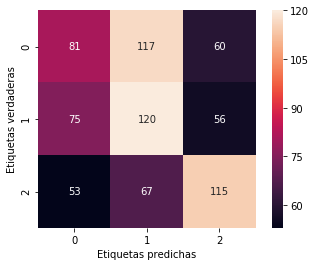

In [5]:
data = pd.read_csv('data_celulares_modelo.csv')
regresion_logistica(data)

#### REGRESION UTILIZANDO TARGET DE 3 DIMENSIONES CON SMOTE (POCAS(0), MEDIAS(1) Y MUCHAS(2))

 
              precision    recall  f1-score   support

           0       0.39      0.44      0.42       258
           1       0.30      0.24      0.27       251
           2       0.51      0.55      0.53       235

    accuracy                           0.41       744
   macro avg       0.40      0.41      0.41       744
weighted avg       0.40      0.41      0.40       744


[[114  82  62]
 [129  61  61]
 [ 46  59 130]]


{'modelo': LogisticRegression(C=10000000000.0)}

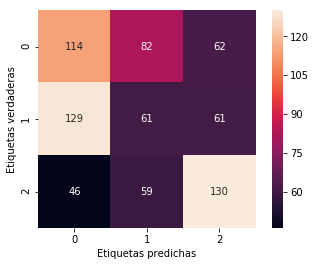

In [6]:
data = pd.read_csv('data_celulares_modelo.csv')
regresion_logistica_balanceando(data)

#### REGRESION UTILIZANDO TARGET DE 2 DIMENSIONES CON SMOTE (POCAS(0) Y MUCHAS(1))

ROC_AUC_SCORE:  0.6147693452380952
 
              precision    recall  f1-score   support

           0       0.69      0.52      0.60       483
           1       0.54      0.71      0.61       384

    accuracy                           0.60       867
   macro avg       0.62      0.61      0.60       867
weighted avg       0.62      0.60      0.60       867


[[253 230]
 [113 271]]


{'modelo': LogisticRegression(C=10000000000.0)}

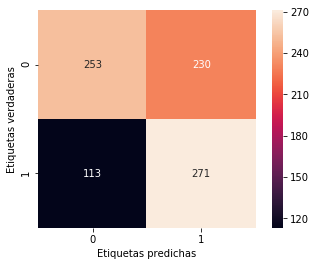

In [7]:
data = pd.read_csv('data_celulares_modelo.csv')
regresion_logistica_balanceando(data, v_target=False)

In [2]:
import pandas as pd

In [17]:
data = pd.read_csv('data_celulares_modelo.csv').iloc[:,1:]
X = pd.DataFrame({'precio':data.precio,'moto':data.moto,'samsung':data.samsung})
y = data.ventas
df = pd.concat([pd.DataFrame(y),X],axis=1)

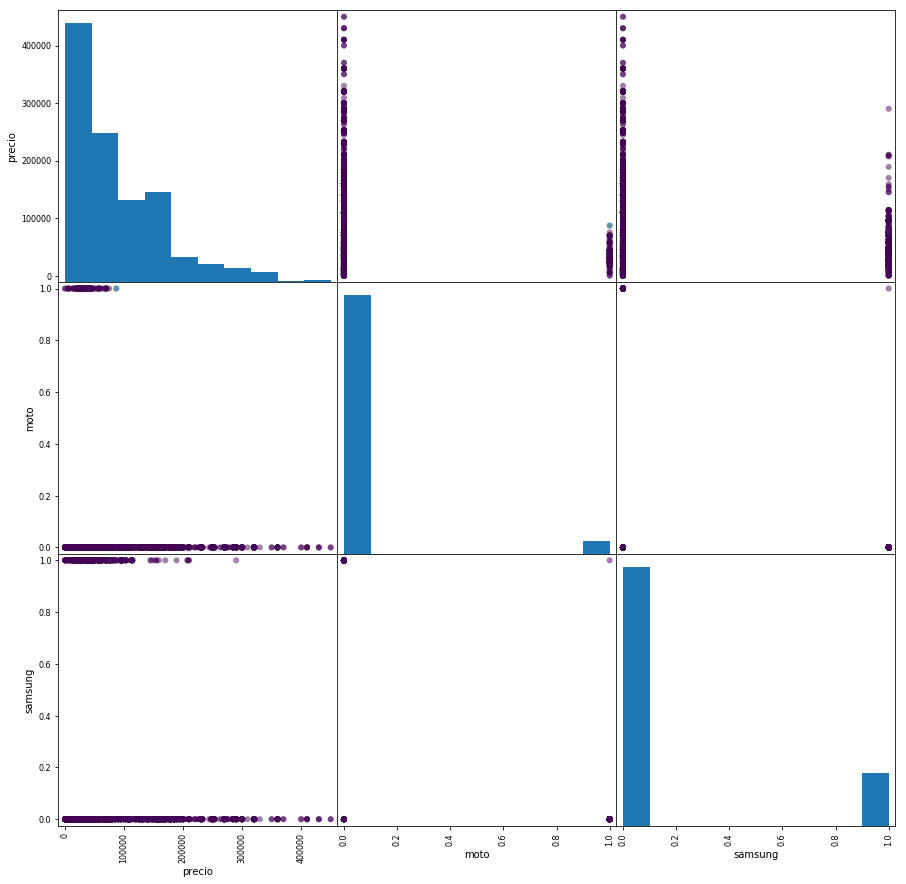

In [18]:
grr = pd.plotting.scatter_matrix(X, c=y, figsize=(15, 15), marker='o',grid=False)

In [15]:
grr

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed1f31f6a0>,
      dtype=object)